## Keras Libraries

In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.datasets import imdb


Using TensorFlow backend.


## Plotly Libraries

In [2]:

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

## Other Libraries

In [3]:
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

## Reading the dataset

In [72]:
from pandas import read_csv
df = pd.read_csv('sample.csv',header=0, encoding='latin-1', sep = ',', names = ['label', 'content'], error_bad_lines=False)

In [73]:
df.head(10)

,label,content
0,Bachelors Degree,A
1,Bachelors Degree,B
2,Bachelors Degree,S
3,Bachelors Degree,BS
4,Bachelors Degree,BT
5,Bachelors Degree,BW
6,Bachelors Degree,CS
7,Bachelors Degree,DM
8,Bachelors Degree,ENE
9,Bachelors Degree,ZBM


# Cleaning Text data

In [75]:
# now define a function to convert the review column into lower case and remove punctiations as well

import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', ''))
    return text
# now apply it on the content column

df['content'] = df['content'].apply(preprocessor)
df.head(10)

,label,content
0,Bachelors Degree,a
1,Bachelors Degree,b
2,Bachelors Degree,s
3,Bachelors Degree,bs
4,Bachelors Degree,bt
5,Bachelors Degree,bw
6,Bachelors Degree,cs
7,Bachelors Degree,dm
8,Bachelors Degree,ene
9,Bachelors Degree,zbm


In [76]:
# a function to tokenise the content column

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

# apply the function on the content column

df['content'] = df['content'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head(10)

,label,content
0,Bachelors Degree,[a]
1,Bachelors Degree,[b]
2,Bachelors Degree,[s]
3,Bachelors Degree,[bs]
4,Bachelors Degree,[bt]
5,Bachelors Degree,[bw]
6,Bachelors Degree,[cs]
7,Bachelors Degree,[dm]
8,Bachelors Degree,[ene]
9,Bachelors Degree,[zbm]


In [77]:
x = df['content'].values

In [78]:
x

array([list(['a']), list(['b']), list(['s']), list(['bs']), list(['bt']),
       list(['bw']), list(['cs']), list(['dm']), list(['ene']),
       list(['zbm']), list(['zbt']), list(['bs', 'p']), list(['bsac']),
       list(['bsad']), list(['bsfs']), list(['aasts']), list(['aasvt']),
       list(['aaswe']), list(['aauct']), list(['appit']),
       list(['as', 'ds']), list(['asche']), list(['as', 'ed']),
       list(['aslas']), list(['asmlt']), list(['assoc']),
       list(['bsb', 'pj']), list(['bsb', 'pm']), list(['bsb', 'ps']),
       list(['bsb', 'rf']), list(['bsb', 'rm']), list(['m', 'a', 'e']),
       list(['m', 'a', 's']), list(['m', 'a', 't']), list(['m', 'acc']),
       list(['m', 'arch']), list(['m', 'b', 'a']), list(['m', 'b', 'e']),
       list(['m', 'b', 'ed']), list(['m', 'c', 'e']),
       list(['m', 'c', 'p']), list(['m', 'd', 's']), list(['aati', 'la']),
       list(['aati', 'tm']), list(['aatm', 'nt']), list(['aats', 'et']),
       list(['adn', 'aas']), list(['as', 'math

# think about stop 

In [ ]:
# import the needed library which contains the stopwords
from nltk.corpus import stopwords

# assign the stopwords to a variable stop
stop = set(stopwords.words('english'))

# a function to remove stop words from the data

def remove_stop(text):
    word = [w for w in text if w not in stop]
    return word

# apply the function to the column review

df['content'] = df['content'].apply(lambda x: remove_stop(x))
df.head(2)

In [80]:
# import the steming libraries to be used

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# initialise the lemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    word = [lemmatizer.lemmatize(w) for w in text]
    return word

# apply the lemmatizer function on the content column

df['content'] = df['content'].apply(lambda x: lemmatize(x))
df.head(10)

,label,content
0,Bachelors Degree,[a]
1,Bachelors Degree,[b]
2,Bachelors Degree,[s]
3,Bachelors Degree,[b]
4,Bachelors Degree,[bt]
5,Bachelors Degree,[bw]
6,Bachelors Degree,[c]
7,Bachelors Degree,[dm]
8,Bachelors Degree,[ene]
9,Bachelors Degree,[zbm]


In [81]:
# The Porter Stemming Algorithm. ... The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.

# initialise the porter and assign it to a function

porter = PorterStemmer()
def port(text):
    word_port = [porter.stem(i) for i in text]
    return word_port

# assign the function to the content column

df['content'] = df['content'].apply(lambda x: port(x))
df.head(10)

,label,content
0,Bachelors Degree,[a]
1,Bachelors Degree,[b]
2,Bachelors Degree,[s]
3,Bachelors Degree,[b]
4,Bachelors Degree,[bt]
5,Bachelors Degree,[bw]
6,Bachelors Degree,[c]
7,Bachelors Degree,[dm]
8,Bachelors Degree,[ene]
9,Bachelors Degree,[zbm]


## check the label balance

In [82]:
# the classes involved in the sentiments a.k.a target
df['label']=df['label'].astype(str)
df['content'] = df['content'].apply(str)


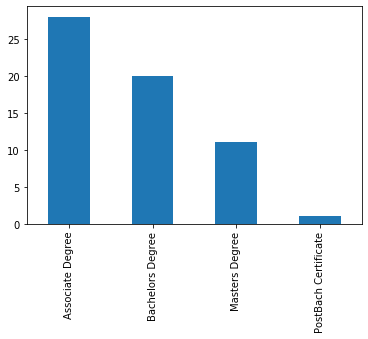

In [83]:
np.unique(df['label'])
df['label'].value_counts().plot(kind='bar')

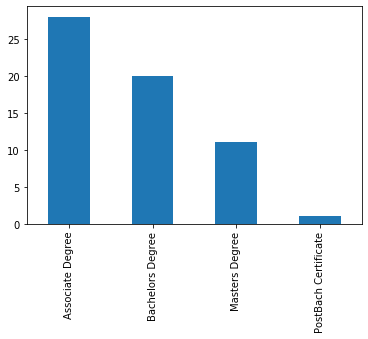

In [84]:
df = df[df.label.apply(lambda x: x !="nan")] 
df = df.reset_index(drop=True)
df['label'].value_counts().plot(kind='bar')

In [15]:
copy_df = df

In [16]:
df = copy_df

## Vectorizing

In [87]:
# we now convert the sentiments into numeric for the machine to understand

from sklearn.preprocessing import LabelEncoder

# now call the class encoder and assign it to a variable, then finally transform

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head(10)

,label,content
0,1,['a']
1,1,['b']
2,1,['s']
3,1,['b']
4,1,['bt']
5,1,['bw']
6,1,['c']
7,1,['dm']
8,1,['ene']
9,1,['zbm']


In [86]:
df.shape

(60, 2)

In [103]:
x = df['content'].values
y = df['label'].values
print(x)

["['a']" "['b']" "['s']" "['b']" "['bt']" "['bw']" "['c']" "['dm']"
 "['ene']" "['zbm']" "['zbt']" "['b', 'p']" "['bsac']" "['bsad']"
 "['bsf']" "['aast']" "['aasvt']" "['aasw']" "['aauct']" "['appit']"
 "['a', 'd']" "['asch']" "['a', 'ed']" "['asla']" "['asmlt']" "['assoc']"
 "['bsb', 'pj']" "['bsb', 'pm']" "['bsb', 'p']" "['bsb', 'rf']"
 "['bsb', 'rm']" "['m', 'a', 'e']" "['m', 'a', 's']" "['m', 'a', 't']"
 "['m', 'acc']" "['m', 'arch']" "['m', 'b', 'a']" "['m', 'b', 'e']"
 "['m', 'b', 'ed']" "['m', 'c', 'e']" "['m', 'c', 'p']" "['m', 'd', 's']"
 "['aati', 'la']" "['aati', 'tm']" "['aatm', 'nt']" "['aat', 'et']"
 "['adn', 'aa']" "['a', 'math']" "['ata', 'ci']" "['ata', 'cst']"
 "['ata', 'ece']" "['ata', 'obt']" "['eet', 'aa']" "['english']"
 "['geolog']" "['histori']" "['non', 'mat']" "['physic']" "['spanish']"
 "['elder', 'law']"]


In [110]:
# we convert the review into numeric for machine purpose

from sklearn.feature_extraction.text import CountVectorizer

# now call the class encoder and assign it to a variable, then finally transform

vectorizer = CountVectorizer(min_df=0)
x = vectorizer.fit_transform(x)

In [111]:
print(vectorizer.get_feature_names())

['aa', 'aast', 'aasvt', 'aasw', 'aat', 'aati', 'aatm', 'aauct', 'acc', 'adn', 'appit', 'arch', 'asch', 'asla', 'asmlt', 'assoc', 'ata', 'bsac', 'bsad', 'bsb', 'bsf', 'bt', 'bw', 'ci', 'cst', 'dm', 'ece', 'ed', 'eet', 'elder', 'ene', 'english', 'et', 'geolog', 'histori', 'la', 'law', 'mat', 'math', 'non', 'nt', 'obt', 'physic', 'pj', 'pm', 'rf', 'rm', 'spanish', 'tm', 'zbm', 'zbt']


In [112]:
x_vec.shape

(60, 51)

In [113]:
# now scale the review encoding with Tfid

from sklearn.feature_extraction.text import TfidfTransformer
tfid = TfidfTransformer()
x_vector = tfid.fit_transform(x)

In [114]:
x_vector.shape

(60, 51)

In [53]:
# now import the class for splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vector, y, test_size = 0.2, random_state = 5, stratify = y)

In [51]:
x_train.shape

(75221, 5420)

In [54]:
input_dim = x_train.shape[1]
input_dim

5420

## Model - naive_bayes

In [ ]:
#######################  first algorithm (naive_bayes) ############################

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

gnb = MultinomialNB()
model = gnb.fit(x_train, y_train)
pred = model.predict(x_test)
score = accuracy_score(y_test, pred)
print('the accuracy of the algorithm is {}'.format(score))
class_report = classification_report(y_test, pred)
print(class_report)

## Model - SVM

In [ ]:
##########################  second algorithm (SVM) ############################
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
model2 = svc.fit(x_train, y_train)

# predicting the final output

pred2 = model2.predict(x_test)
pred2 = pd.DataFrame(pred2)

# calculating the accuracy score
score2 = accuracy_score(y_test, pred2)
class_report2 = classification_report(y_test, pred2)

# print out the classification report

print(class_report2)